In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

import matplotlib.path as mpath
import cartopy.feature as cfeature

from xgcm import Grid

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num

import gsw

import pyresample


In [2]:
dg10 = xr.open_dataset("/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom10_frc/waom10extend_grd.nc")
lat_rho_10 = dg10.variables["lat_rho"]
lon_rho_10 = dg10.variables["lon_rho"]
dg10.close()

dg4 = xr.open_dataset("/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom4_frc/waom4extend_grd.nc")
lat_rho_4 = dg4.variables["lat_rho"]
lon_rho_4 = dg4.variables["lon_rho"]
dg4.close()

dg2 = xr.open_dataset("/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom2_frc/waom2extend_grd.nc")
lat_rho_2 = dg2.variables["lat_rho"]
lon_rho_2 = dg2.variables["lon_rho"]
dg2.close()



In [3]:
rho_grid=np.arange(26.,28.,0.05) # for sigma-0
len_rho_grid=len(rho_grid)

# figures
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 1000/0.05

print(rho_grid[19],rho_grid[39])


26.950000000000014 27.950000000000028


In [4]:
# read SOSE SSS
dd = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom10_frc/waom10extend_nudge.nc')
SSS = dd.variables['SSS']
dd.close()

In [5]:
# reading surface salt flux files:

ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom10_frc/waom10extend_swflux.nc')
swflx_10 = ds.variables['swflux']
ds.close()

ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom4_frc/waom4extend_swflux.nc')
swflx_4 = ds.variables['swflux']
ds.close()

ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom2_frc/waom2extend_swflux.nc')
swflx_2 = ds.variables['swflux']
ds.close()
                    

In [6]:
# read WAOM10 WMT maps
d10 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_WMTmaps.nc')
salt_net_10 = d10.variables['map_salt_net']
salt_adv_10 = d10.variables['map_salt_adv']
salt_diff_10 = d10.variables['map_salt_diff']
salt_hdiff_10 = d10.variables['map_salt_hdiff']
salt_vdiff_10 = d10.variables['map_salt_vdiff']
salt_sfc_10 = d10.variables['map_salt_sfc']
d10.close()


In [7]:
# read WAOM4 WMT maps
d4 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom4extend_shflim_S_0.25Q/output_yr10_diag/Full_vint_WMTmaps.nc')
salt_net_4 = d4.variables['map_salt_net']
salt_adv_4 = d4.variables['map_salt_adv']
salt_diff_4 = d4.variables['map_salt_diff']
salt_hdiff_4 = d4.variables['map_salt_hdiff']
salt_vdiff_4 = d4.variables['map_salt_vdiff']
salt_sfc_4 = d4.variables['map_salt_sfc']
d4.close()

In [8]:
# read WAOM4-NOTIDES WMT maps
d4 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom4extend_shflim_S_0.25Q/output_yr10_notides_diag/Full_vint_WMTmaps.nc')
salt_net_4nt = d4.variables['map_salt_net']
salt_adv_4nt = d4.variables['map_salt_adv']
salt_diff_4nt = d4.variables['map_salt_diff']
salt_hdiff_4nt = d4.variables['map_salt_hdiff']
salt_vdiff_4nt = d4.variables['map_salt_vdiff']
salt_sfc_4nt = d4.variables['map_salt_sfc']
d4.close()

In [9]:
# read WAOM4-COARSE WMT maps
d4 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom4extend_shflim_S_0.25Q/output_yr10_10km-bathy_diag/Full_vint_WMTmaps.nc')
salt_net_4c = d4.variables['map_salt_net']
salt_adv_4c = d4.variables['map_salt_adv']
salt_diff_4c = d4.variables['map_salt_diff']
salt_hdiff_4c = d4.variables['map_salt_hdiff']
salt_vdiff_4c = d4.variables['map_salt_vdiff']
salt_sfc_4c = d4.variables['map_salt_sfc']
d4.close()

In [10]:
# read WAOM2 WMT maps
d2 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom2extend_shflim_S_0.25Q/output_yr5_diag/Full_vint_WMTmaps.nc')
salt_net_2 = d2.variables['map_salt_net']
salt_adv_2 = d2.variables['map_salt_adv']
salt_diff_2 = d2.variables['map_salt_diff']
salt_hdiff_2 = d2.variables['map_salt_hdiff']
salt_vdiff_2 = d2.variables['map_salt_vdiff']
salt_sfc_2 = d2.variables['map_salt_sfc']
d2.close()

In [11]:
# read WAOM10/4/2 WMT maps for the shelf only:
d10 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_WMTmaps_shelf.nc')
salt_sfc_10_shelf = d10.variables['map_salt_sfc']
d10.close()

d4 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom4extend_shflim_S_0.25Q/output_yr10_diag/Full_vint_WMTmaps_shelf.nc')
salt_sfc_4_shelf = d4.variables['map_salt_sfc']
d4.close()

d2 = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom2extend_shflim_S_0.25Q/output_yr5_diag/Full_vint_WMTmaps_shelf.nc')
salt_sfc_2_shelf = d2.variables['map_salt_sfc']
d2.close()


In [12]:
# read bottom temperature and currents from annual, 10km-interpolated netcdf file:
# --- created with /users/boeiradi/COLD_project/postprocessing/waom_notebook/Maps_validations/WAOM10x4x2extend_shflim_S_0.25Q_TSVel_botXsfc.py

dt = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom10extend_shflim_S_0.25Q/output_20yr_diag/WAOM10x4x2_Annual_bottom_temp_UV_maps.nc')
temp_ann_bot_10 = np.squeeze(dt.variables['temp_ann_bot_10'])
temp_ann_bot_4 = np.squeeze(dt.variables['temp_ann_bot_4'])
temp_ann_bot_4nt = np.squeeze(dt.variables['temp_ann_bot_4nt'])
temp_ann_bot_4c = np.squeeze(dt.variables['temp_ann_bot_4c'])
temp_ann_bot_2 = np.squeeze(dt.variables['temp_ann_bot_2'])

temp_ann_sfc_10 = np.squeeze(dt.variables['temp_ann_sfc_10'])
temp_ann_sfc_4 = np.squeeze(dt.variables['temp_ann_sfc_4'])
temp_ann_sfc_4nt = np.squeeze(dt.variables['temp_ann_sfc_4nt'])
temp_ann_sfc_4c = np.squeeze(dt.variables['temp_ann_sfc_4c'])
# temp_ann_sfc_2 = np.squeeze(dt.variables['temp_ann_sfc_2'])

salt_ann_bot_10 = np.squeeze(dt.variables['salt_ann_bot_10'])
salt_ann_bot_4 = np.squeeze(dt.variables['salt_ann_bot_4'])
salt_ann_bot_4nt = np.squeeze(dt.variables['salt_ann_bot_4nt'])
salt_ann_bot_4c = np.squeeze(dt.variables['salt_ann_bot_4c'])
salt_ann_bot_2 = np.squeeze(dt.variables['salt_ann_bot_2'])

salt_ann_sfc_10 = np.squeeze(dt.variables['salt_ann_sfc_10'])
salt_ann_sfc_4 = np.squeeze(dt.variables['salt_ann_sfc_4'])
salt_ann_sfc_4nt = np.squeeze(dt.variables['salt_ann_sfc_4nt'])
salt_ann_sfc_4c = np.squeeze(dt.variables['salt_ann_sfc_4c'])
salt_ann_sfc_2 = np.squeeze(dt.variables['salt_ann_sfc_2'])

u_10_bot = np.squeeze(dt.variables['u_10_bot'])
v_10_bot = np.squeeze(dt.variables['v_10_bot'])
u_4_bot = np.squeeze(dt.variables['u_4_bot'])
v_4_bot = np.squeeze(dt.variables['v_4_bot'])
u_4nt_bot = np.squeeze(dt.variables['u_4nt_bot'])
v_4nt_bot = np.squeeze(dt.variables['v_4nt_bot'])
u_4c_bot = np.squeeze(dt.variables['u_4c_bot'])
v_4c_bot = np.squeeze(dt.variables['v_4c_bot'])
u_2_bot = np.squeeze(dt.variables['u_2_bot'])
v_2_bot = np.squeeze(dt.variables['v_2_bot'])

xs_10 = np.squeeze(dt.variables['xs_10'])
ys_10 = np.squeeze(dt.variables['ys_10'])
xs_4 = np.squeeze(dt.variables['xs_4'])
ys_4 = np.squeeze(dt.variables['ys_4'])
xs_2 = np.squeeze(dt.variables['xs_2'])
ys_2 = np.squeeze(dt.variables['ys_2'])

# z_rho_bot_10 = np.squeeze(dt.variables['z_rho_10_bot'])
# z_rho_bot_4 = np.squeeze(dt.variables['z_rho_4_bot'])
# z_rho_bot_2 = np.squeeze(dt.variables['z_rho_2_bot'])

Tf_bot_10 = np.squeeze(dt.variables['Tf_10_bot'])
Tf_bot_4 = np.squeeze(dt.variables['Tf_4_bot'])
Tf_bot_2 = np.squeeze(dt.variables['Tf_2_bot'])
Tf_sfc_10 = np.squeeze(dt.variables['Tf_10_sfc'])
Tf_sfc_4 = np.squeeze(dt.variables['Tf_4_sfc'])
Tf_sfc_2 = np.squeeze(dt.variables['Tf_2_sfc'])

dt.close()


In [13]:
### plot maps
proj = ccrs.SouthPolarStereo()

di = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom2extend_shflim_S_0.25Q/output_yr5_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
h = di.variables["h"]


In [14]:
# Bottom velocity magnitude
V10_bot = np.sqrt(u_10_bot*u_10_bot + v_10_bot*v_10_bot)
V4_bot = np.sqrt(u_4_bot*u_4_bot + v_4_bot*v_4_bot)
V2_bot = np.sqrt(u_2_bot*u_2_bot + v_2_bot*v_2_bot)
V4c_bot = np.sqrt(u_4c_bot*u_4c_bot + v_4c_bot*v_4c_bot)
# re-grid 4km currents to 10km grid:
w10_def = pyresample.geometry.SwathDefinition(lons=lon_rho_10,lats=lat_rho_10)
w4_def = pyresample.geometry.SwathDefinition(lons=lon_rho_4,lats=lat_rho_4)
w2_def = pyresample.geometry.SwathDefinition(lons=lon_rho_2,lats=lat_rho_2)

wf = lambda r: 1/r

V4_bot_interp = pyresample.kd_tree.resample_custom(w4_def,V4_bot.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)
V2_bot_interp = pyresample.kd_tree.resample_custom(w2_def,V2_bot.values,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)
V4c_bot_interp = pyresample.kd_tree.resample_custom(w4_def,V4c_bot.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)

Tf_sfc_4_interp = pyresample.kd_tree.resample_custom(w4_def,Tf_sfc_4.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)

Tf_sfc_2_interp = pyresample.kd_tree.resample_custom(w2_def,Tf_sfc_2.values,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)

#temp_ann_bot_4nt
# temp_sfc_4_interp = pyresample.kd_tree.resample_custom(w4_def,temp_ann_sfc_4.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)
# temp_sfc_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,temp_ann_sfc_4nt.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)
# temp_bot_4_interp = pyresample.kd_tree.resample_custom(w4_def,temp_ann_bot_4.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)
# temp_bot_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,temp_ann_bot_4nt.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)

# salt_sfc_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_ann_sfc_4.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)
# salt_sfc_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,salt_ann_sfc_4nt.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)
# salt_bot_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_ann_bot_4.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)
# salt_bot_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,salt_ann_bot_4nt.values,w10_def,\
#                                          radius_of_influence=30000,neighbours=4,weight_funcs=wf)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 4 neighbours within 30000 m for some data points
  warnings.warn(('Possible more than %s neighbours '


In [15]:
Tf_bot_2.shape

(2800, 3150)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell ed

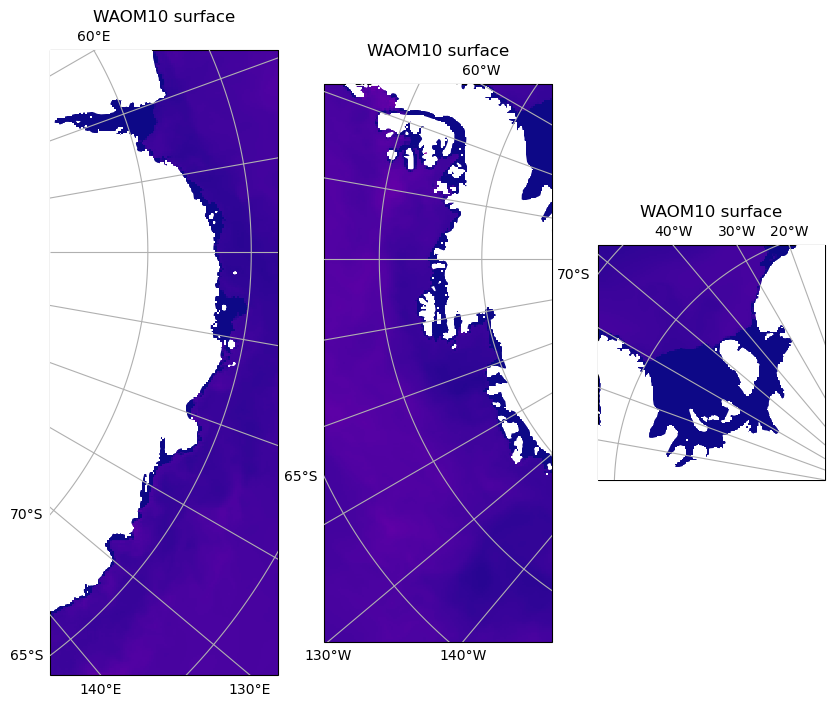

In [16]:
proj = ccrs.SouthPolarStereo()

def lonlat_labels_Eant(ax):
    # latitude labels
    ax.text(120,-65,'65$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
#     ax.text(120,-75,'75$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(58,-78,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(80,-80,'80$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(105,-80,'100$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(130,-80,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(155,-80,'140$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    return



fig = plt.figure(figsize=(10,12))

ax1 = fig.add_subplot(1,3,1, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-1.9, vmax=-1.5)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([68, 142, -65.5, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')


ax2 = fig.add_subplot(1,3,2, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-1.9, vmax=-1.5)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')

ax3 = fig.add_subplot(1,3,3, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-1.9, vmax=-1.5)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')
plt.show()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


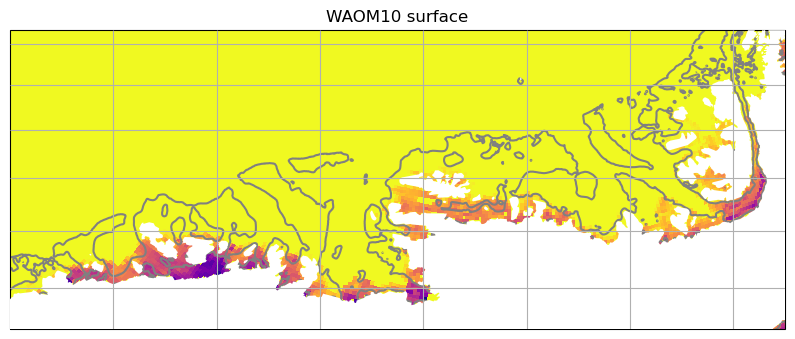

In [21]:
proj = ccrs.Mercator()

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,1,1, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-2.5, vmax=-1.9)
ax1.gridlines(zorder=4)
ax1.set_extent([-140, -65, -76, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')
# plt.colorbar()
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysi

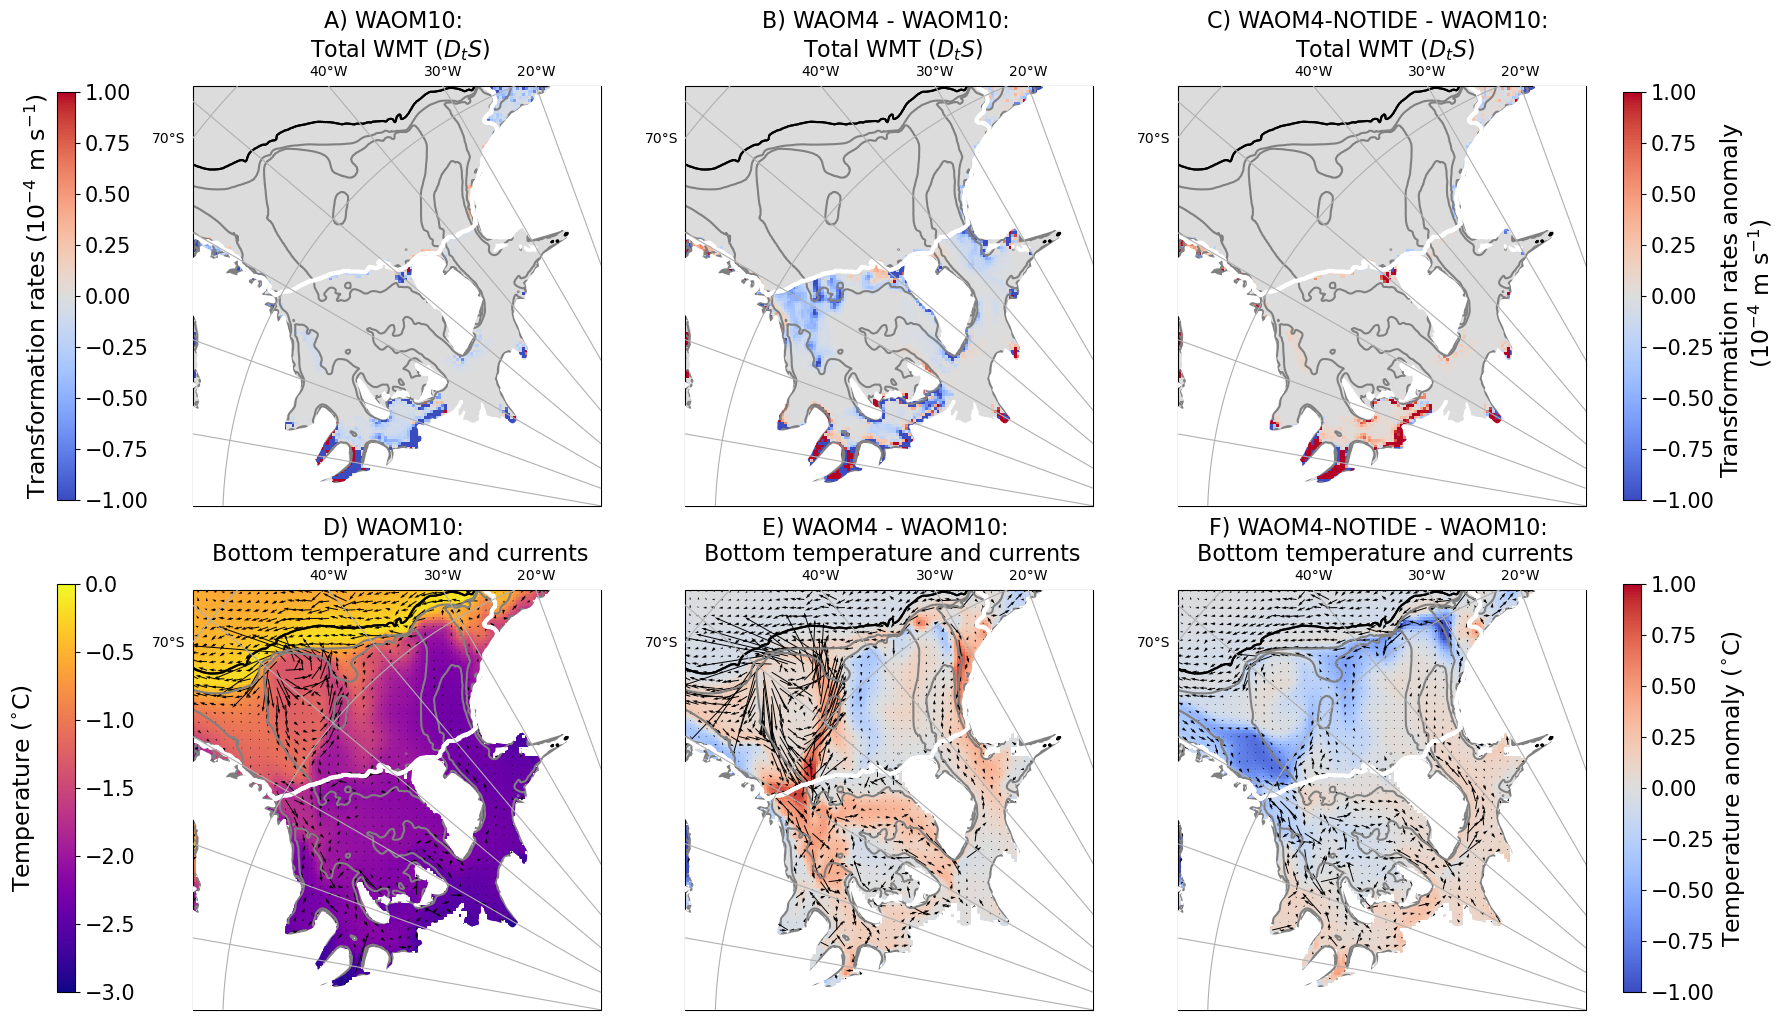

In [22]:
### Figures for the paper:

# 1) FRIS: only show WAOM10 x WAOM4 x WAOM4-NOTIDE: upper row
# bottom temperature and annual currents: lower row

## plots FRIS
proj = ccrs.SouthPolarStereo()
# proj = ccrs.Mercator()
# integrated from 27.3:27.5 kg m-3:

# indexes [imin:imax]
imin=7
imax=11

salt_net_Wed_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_Wed_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_Wed_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_Wed_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_Wed_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_Wed_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_Wed_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_Wed_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_Wed_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_Wed_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_Wed_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_Wed_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_Wed_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_Wed_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_Wed_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_Wed_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_Wed_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_Wed_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_Wed_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_Wed_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_Wed_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_Wed_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_Wed_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_Wed_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_Wed_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_Wed_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_Wed_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_Wed_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_Wed_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_Wed_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_Wed_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_Wed_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4nt,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)


# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(1500,2500,1)
ylimit = np.arange(500,1500,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(4,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(4,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_Wed_4_interp-salt_vdiff_Wed_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(4,3,3, projection=proj)
plt.title('C) WAOM4-NOTIDE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_Wed_4nt_interp-salt_vdiff_Wed_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.535, 0.01, 0.34])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m s$^{-1}$)', fontsize=17, labelpad=-90)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.535, 0.01, 0.34])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=-3
tmax=0
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(4,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom temperature and currents', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# for anomalies
atmin=-1
atmax=1

ax5 = fig.add_subplot(4,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Bottom temperature and currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax6 = fig.add_subplot(4,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4nt-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4nt_bot[::vs4,::vs4],v_4nt_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-NOTIDE - WAOM10: \n Bottom temperature and currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.125, 0.01, 0.34])
cb = fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17, labelpad=-90)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.125, 0.01, 0.34])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-45)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4nt_WMTmaps_Full_salt_tempVel_iceshelf_FRIS_27.3-27.5kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell ed

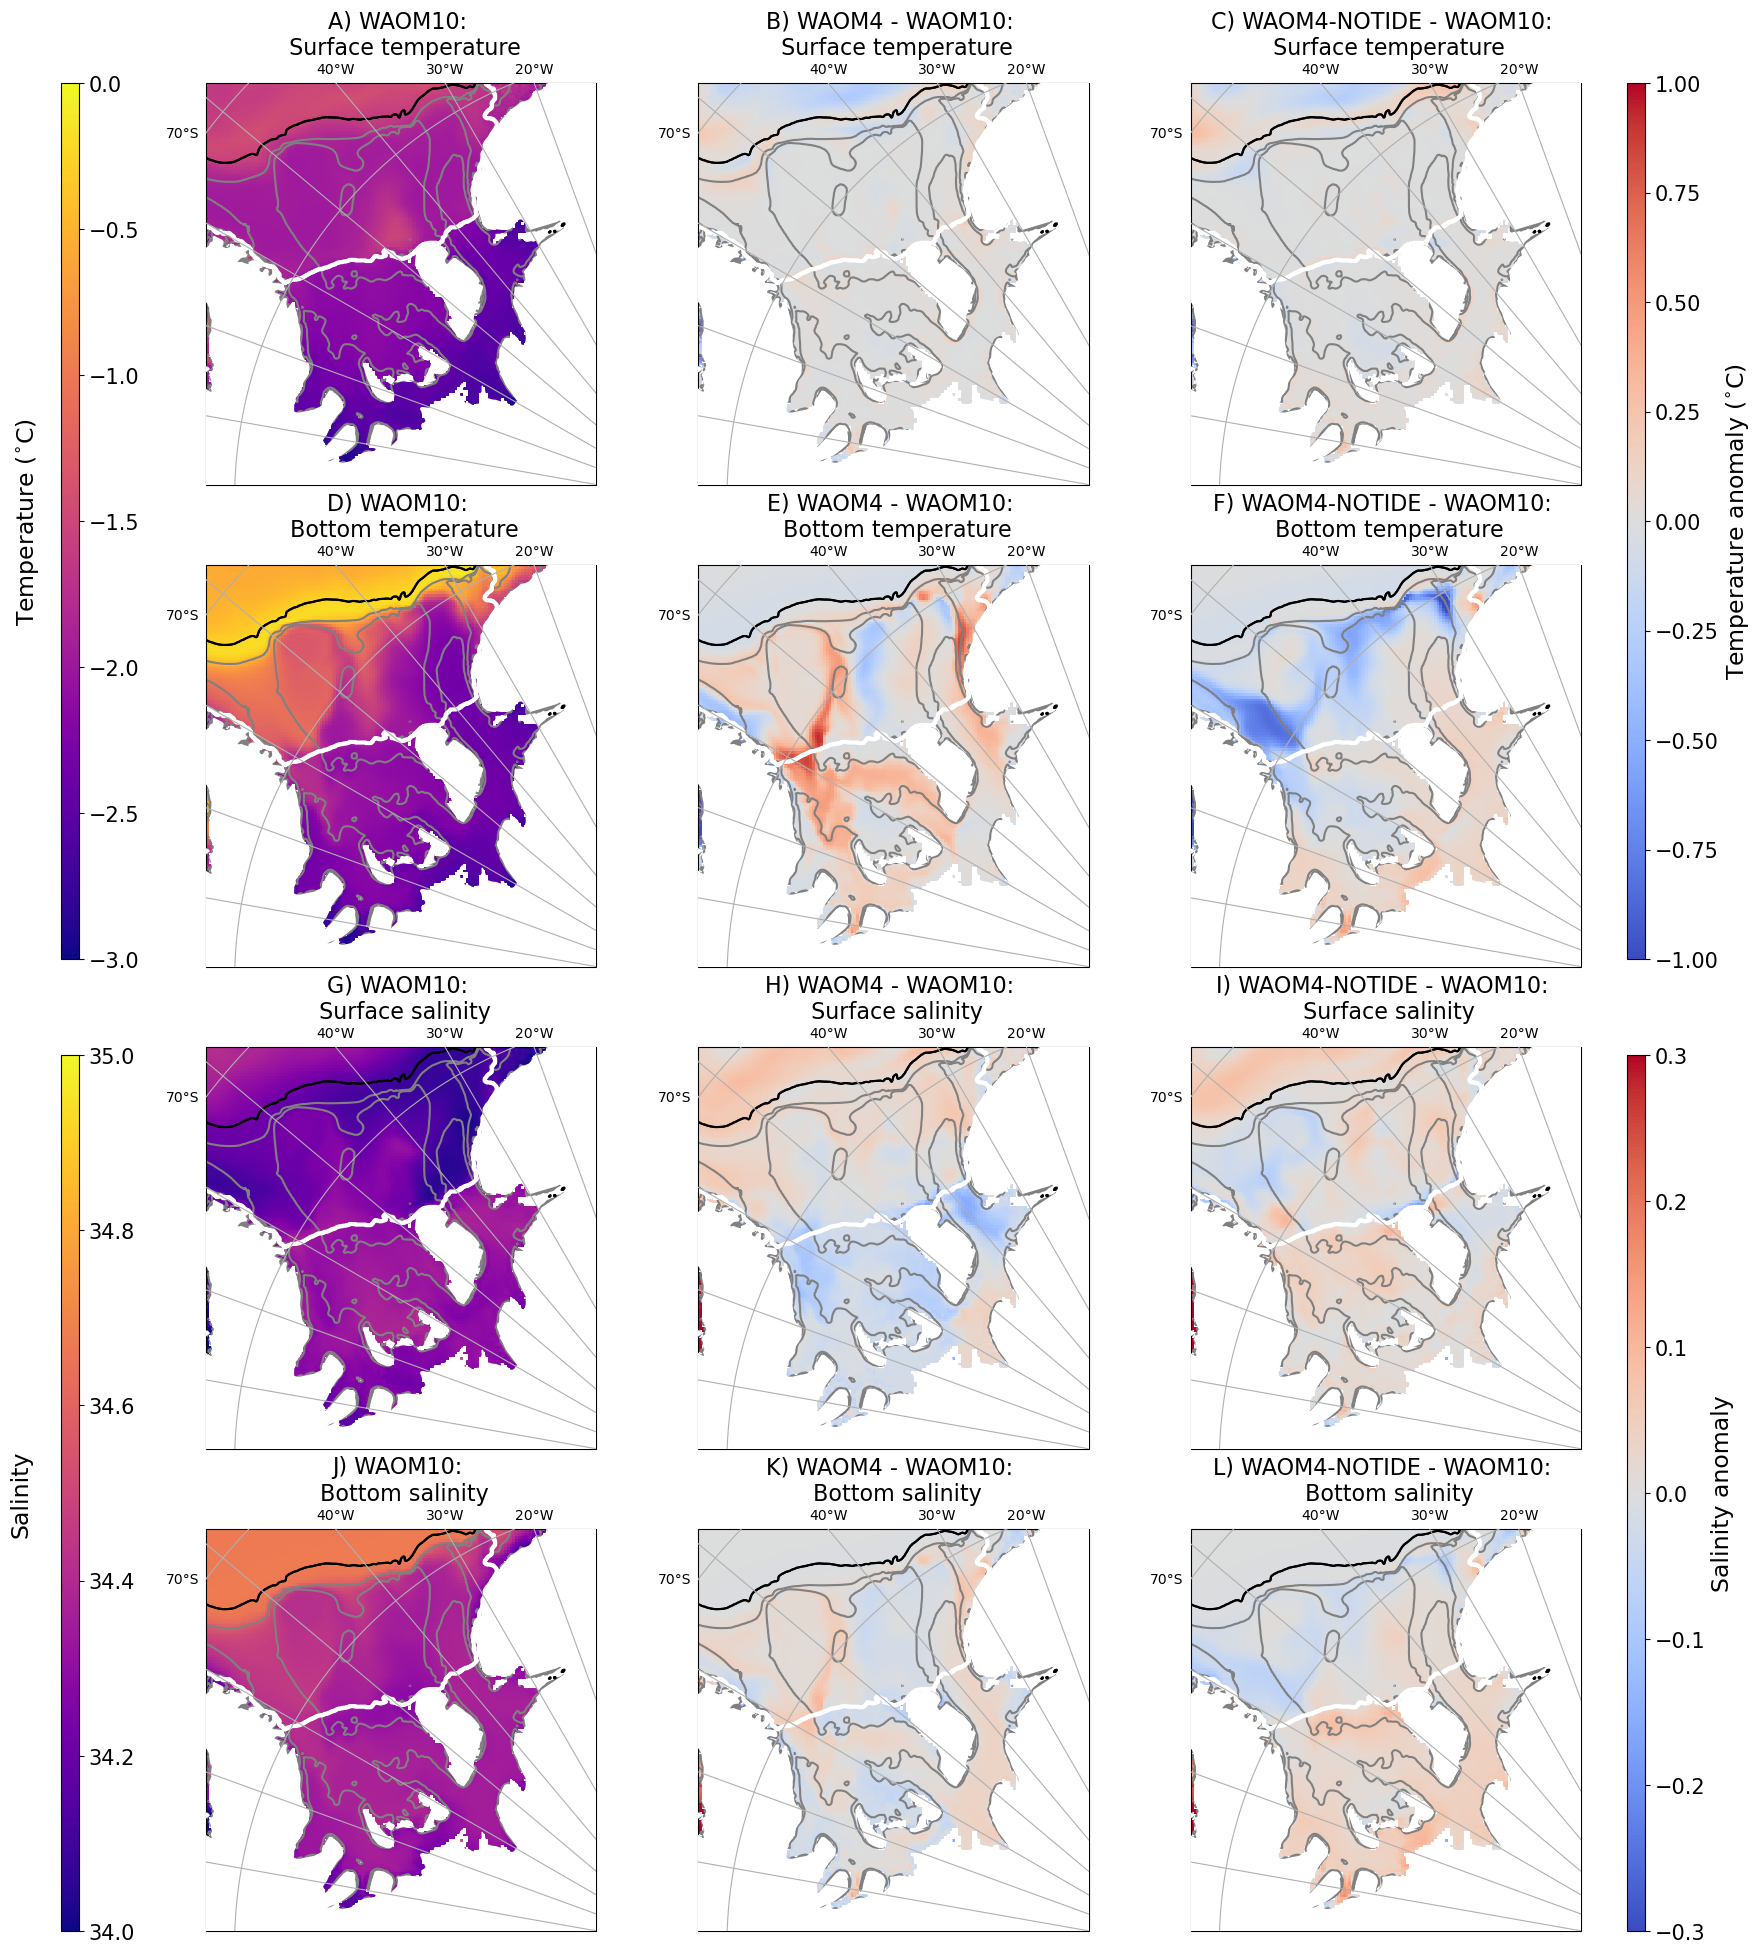

In [37]:
### Figures for the paper:

# 1) FRIS: only show WAOM10 x WAOM4 x WAOM4-NOTIDE
# surface & bottom temperature & salinity: supplemental material

# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(1500,2500,1)
ylimit = np.arange(500,1500,1)

fig = plt.figure(figsize=(18,24))

# temperature (annual)
tmin=-3
tmax=0
atmin=-1
atmax=1

ax1 = fig.add_subplot(4,3,1, projection=proj)
plt.title('A) WAOM10: \n Surface temperature', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(4,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Surface temperature', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(temp_ann_sfc_4-temp_ann_sfc_10), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(4,3,3, projection=proj)
plt.title('C) WAOM4-NOTIDE - WAOM10: \n Surface temperature', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(temp_ann_sfc_4nt-temp_ann_sfc_10), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.515, 0.01, 0.365])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17, labelpad=-90)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.515, 0.01, 0.365])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

ax4 = fig.add_subplot(4,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('D) WAOM10: \n Bottom temperature', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# for anomalies
atmin=-1
atmax=1

ax5 = fig.add_subplot(4,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('E) WAOM4 - WAOM10: \n Bottom temperature', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax6 = fig.add_subplot(4,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4nt-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('F) WAOM4-NOTIDE - WAOM10: \n Bottom temperature', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# salinity
tmin=34
tmax=35
atmin=-0.3
atmax=0.3

ax7 = fig.add_subplot(4,3,7, projection=proj)
plt.title('G) WAOM10: \n Surface salinity', fontsize=16)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
gl = ax7.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax7.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax8 = fig.add_subplot(4,3,8, projection=proj)
plt.title('H) WAOM4 - WAOM10: \n Surface salinity', fontsize=16)
csd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_ann_sfc_4-salt_ann_sfc_10), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax8.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax8.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax9 = fig.add_subplot(4,3,9, projection=proj)
plt.title('I) WAOM4-NOTIDE - WAOM10: \n Surface salinity', fontsize=16)
csd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_ann_sfc_4nt-salt_ann_sfc_10), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax9.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax9.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax9.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.11, 0.01, 0.365])
fig.colorbar(cs, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Salinity', fontsize=17, labelpad=-90)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.11, 0.01, 0.365])
fig.colorbar(csd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

ax10 = fig.add_subplot(4,3,10, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('J) WAOM10: \n Bottom salinity', fontsize=16)
gl = ax10.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax10.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax10.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax11 = fig.add_subplot(4,3,11, projection=proj)
csd=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('K) WAOM4 - WAOM10: \n Bottom salinity', fontsize=16)
gl = ax11.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax11.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax11.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax12 = fig.add_subplot(4,3,12, projection=proj)
csd=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4nt-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('L) WAOM4-NOTIDE - WAOM10: \n Bottom salinity', fontsize=16)
gl = ax12.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax12.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax12.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

name_fig="waom10x4x4nt_WMTmaps_Full_salt+temp_bot+sfc_iceshelf_FRIS.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [17]:
# #salt_vdiff_Wed_4
# salt_vdiff_Wed_4_interp1 = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
#                                          radius_of_influence=300000,neighbours=4,weight_funcs=wf)
# salt_vdiff_Wed_4_interp2 = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
#                                          radius_of_influence=300000,neighbours=10,weight_funcs=wf)

# # scale for WMT rates:
# scl = 1e4

# fig = plt.figure(figsize=(18,16))

# ax1 = fig.add_subplot(4,3,1, projection=proj)
# plt.title('A) WAOM4: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# ax1.gridlines(zorder=4)
# ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
# ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
# plt.ylabel('WAOM10',fontsize=16)

# ax2 = fig.add_subplot(4,3,2, projection=proj)
# plt.title('B) testing interp 1', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_4_interp1*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# ax2.gridlines(zorder=4)
# ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
# ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# ax3 = fig.add_subplot(4,3,3, projection=proj)
# plt.title('C) testing interp 2', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_4_interp2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# ax3.gridlines(zorder=4)
# ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
# ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# plt.show()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysi

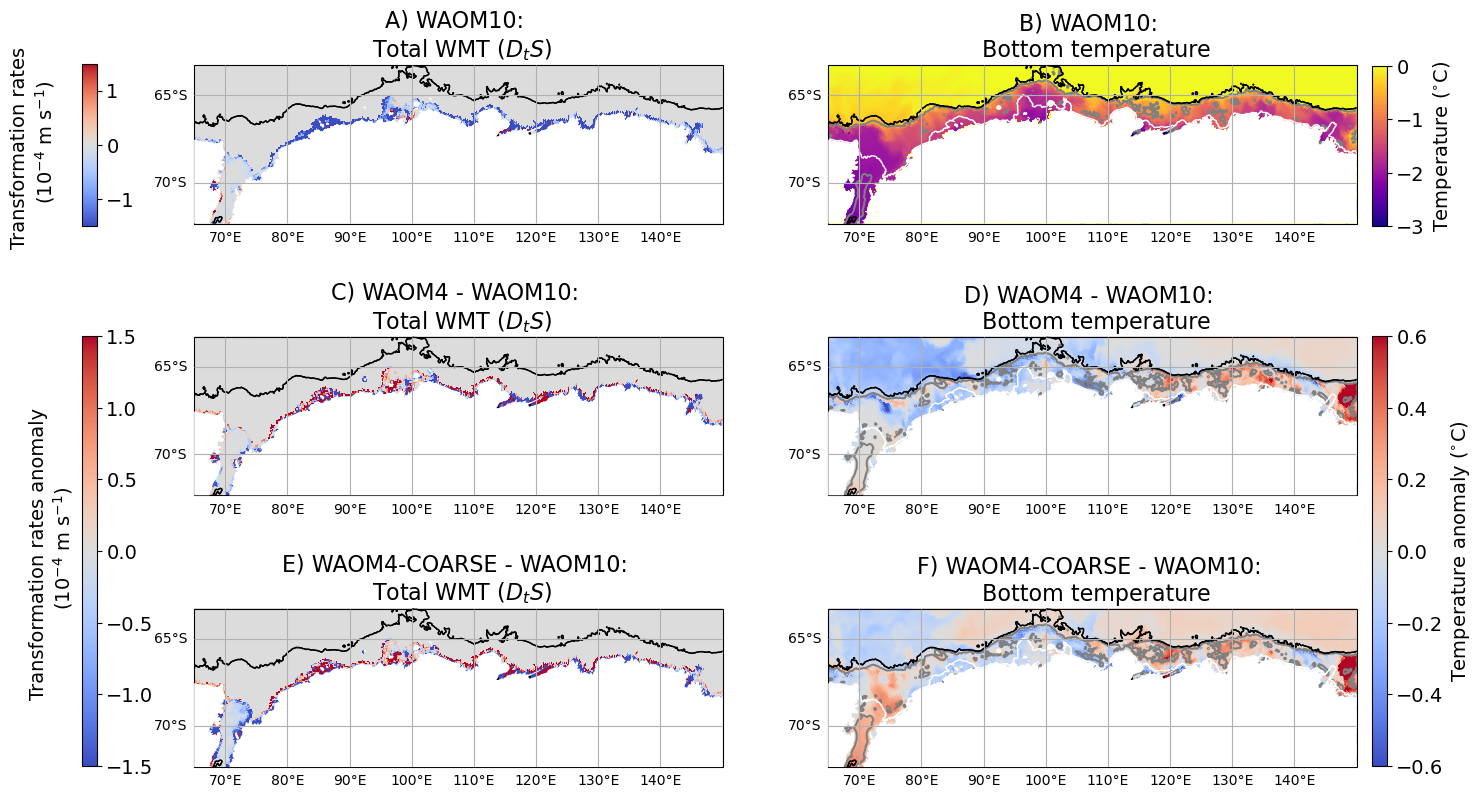

In [46]:
### Figures for the paper:

# 2) East Antarctica: only show WAOM10 x WAOM4 x WAOM4-COARSE: upper row
# bottom temperature and annual currents: lower row

## plots EAnt
# proj = ccrs.SouthPolarStereo()
proj = ccrs.Mercator()

# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_EAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_EAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_EAnt_4c_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_EAnt_4c,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)

# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4
ratio = .3

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3,2,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([65, 150, -72, -63], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
x_left, x_right = ax1.get_xlim()
y_low, y_high = ax1.get_ylim()
ax1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(800,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(3,2,3, projection=proj)
plt.title('C) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([65, 150, -72, -63], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
x_left, x_right = ax2.get_xlim()
y_low, y_high = ax2.get_ylim()
ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(800,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,2,5, projection=proj)
plt.title('E) WAOM4-COARSE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4c_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([65, 150, -72, -63], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
x_left, x_right = ax3.get_xlim()
y_low, y_high = ax3.get_ylim()
ax3.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(800,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.685, 0.01, 0.1625])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates \n (10$^{-4}$ m s$^{-1}$)', fontsize=14, labelpad=-90)
cbar_ax0.tick_params(labelsize=14)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.05, 0.145, 0.01, 0.43])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m s$^{-1}$)', fontsize=14, labelpad=-90)
cbar_ax1.tick_params(labelsize=14)

# temperature and currents (annual)
tmin=-3
tmax=0

# spacing for current vectors:
vs10=5
vs4=12
vs2=24

# projection for quiver plots:
proj_vel = ccrs.SouthPolarStereo() 
# proj_vel = proj #ccrs.PlateCarree()

ax4 = fig.add_subplot(3,2,2, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=proj_vel, scale=1.)
plt.title('B) WAOM10: \n Bottom temperature', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([65, 150, -72, -63], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
x_left, x_right = ax4.get_xlim()
y_low, y_high = ax4.get_ylim()
ax4.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(1000,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.6
atmax=.6

ax5 = fig.add_subplot(3,2,4, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=proj_vel, scale=1.)
plt.title('D) WAOM4 - WAOM10: \n Bottom temperature', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([65, 150, -72, -63], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
x_left, x_right = ax5.get_xlim()
y_low, y_high = ax5.get_ylim()
ax5.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(800,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,2,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4c-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=proj_vel, scale=1.)
plt.title('F) WAOM4-COARSE - WAOM10: \n Bottom temperature', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([65, 150, -72, -63], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
x_left, x_right = ax6.get_xlim()
y_low, y_high = ax6.get_ylim()
ax6.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(800,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.91, 0.685, 0.01, 0.16])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=14)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=14)

cbar_ax3 = fig.add_axes([0.91, 0.145, 0.01, 0.43])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=14)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=14)

name_fig="waom10x4x4c_WMTmaps_Full_salt_tempVel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
### Figures for the paper:

# 2) East Antarctica: only show WAOM10 x WAOM4 x WAOM4-COARSE: upper row
# bottom temperature and annual currents: lower row

## plots EAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)


# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(3,2,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(3,2,3, projection=proj)
plt.title('C) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,2,5, projection=proj)
plt.title('E) WAOM4-COARSE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4c_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.125, 0.67, 0.35, 0.01])
fig.colorbar(cy, cax=cbar_ax0, orientation='horizontal')
cbar_ax0.set_xlabel('Transformation rates (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.125, 0.4, 0.35, 0.01])
fig.colorbar(cyd, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('Transformation rates anomaly (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=34.2
tmax=35

# spacing for current vectors:
vs10=5
vs4=12
vs2=24

ax4 = fig.add_subplot(3,2,2, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=proj, scale=1.)
plt.title('B) WAOM10: \n Bottom salinity and currents', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(3,2,4, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=proj, scale=1.)
plt.title('D) WAOM4 - WAOM10: \n Bottom salinity and currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,2,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4c-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=proj, scale=1.)
plt.title('F) WAOM4-COARSE - WAOM10: \n Bottom salinity and currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.55, 0.67, 0.35, 0.01])
fig.colorbar(ct1, cax=cbar_ax2, orientation='horizontal')
cbar_ax2.set_xlabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.55, 0.4, 0.35, 0.01])
fig.colorbar(ct2, cax=cbar_ax3, orientation='horizontal')
cbar_ax3.set_xlabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)


name_fig="waom10x4x4c_WMTmaps_Full_salt_saltVel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit c

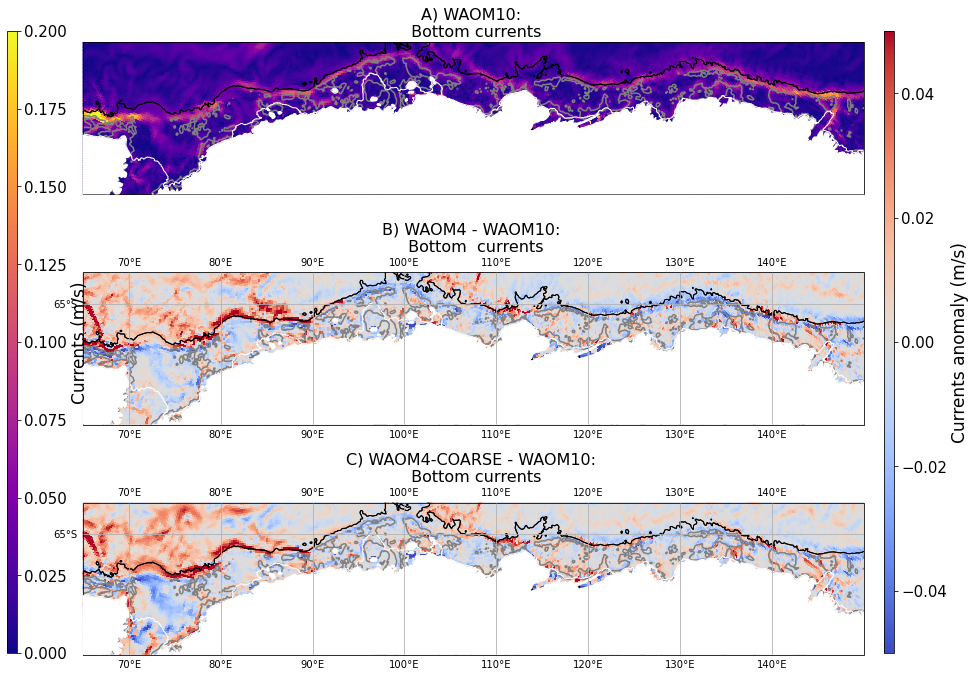

In [23]:
# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(14,12))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(3,1,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom currents', fontsize=16)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.05
atmax=.05

ax5 = fig.add_subplot(3,1,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Bottom  currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,1,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4c_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM4-COARSE - WAOM10: \n Bottom currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17, labelpad=-90)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_Vel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit c

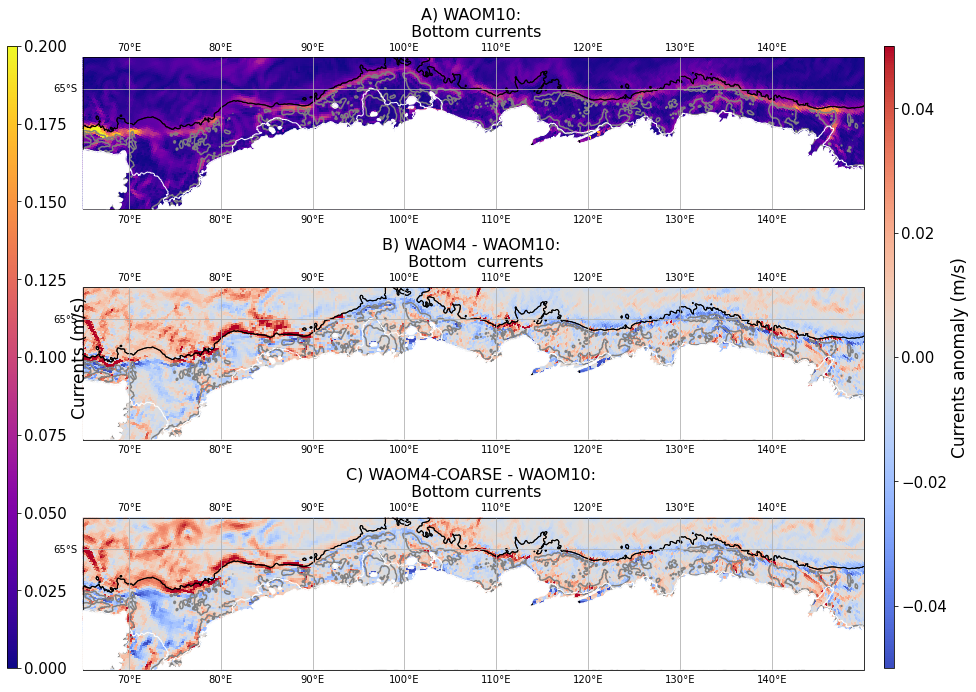

In [24]:
# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(14,12))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(3,1,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom currents', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.05
atmax=.05

ax5 = fig.add_subplot(3,1,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Bottom  currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,1,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4c_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM4-COARSE - WAOM10: \n Bottom currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(300,6000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_Vel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797:

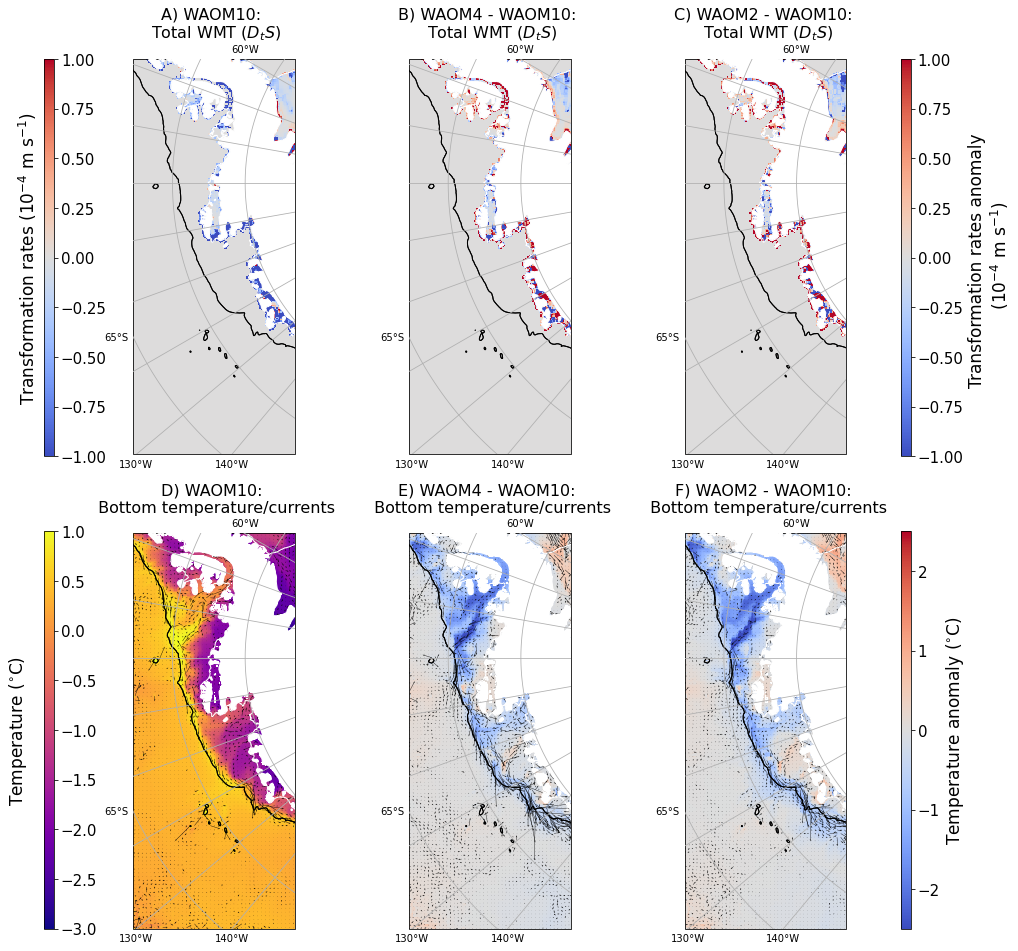

In [13]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# bottom temperature and annual currents: lower row

## plots WAnt
proj = ccrs.SouthPolarStereo()


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_WAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_WAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_WAnt_2_interp = pyresample.kd_tree.resample_custom(w2_def,salt_vdiff_WAnt_2,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)


# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(14,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_4_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_2_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.07, 0.535, 0.01, 0.345])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m s$^{-1}$)', fontsize=17, labelpad=-90)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.535, 0.01, 0.345])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# temperature and currents (annual)
tmin=-3
tmax=1
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=proj, scale=1.)
plt.title('D) WAOM10: \n Bottom temperature/currents', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-2.5
atmax=2.5

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=proj, scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Bottom temperature/currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_2-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=proj, scale=1.)
plt.title('F) WAOM2 - WAOM10: \n Bottom temperature/currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.07, 0.125, 0.01, 0.345])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17, labelpad=-90)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.125, 0.01, 0.345])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt_tempVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300, bbox='tight')
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit c

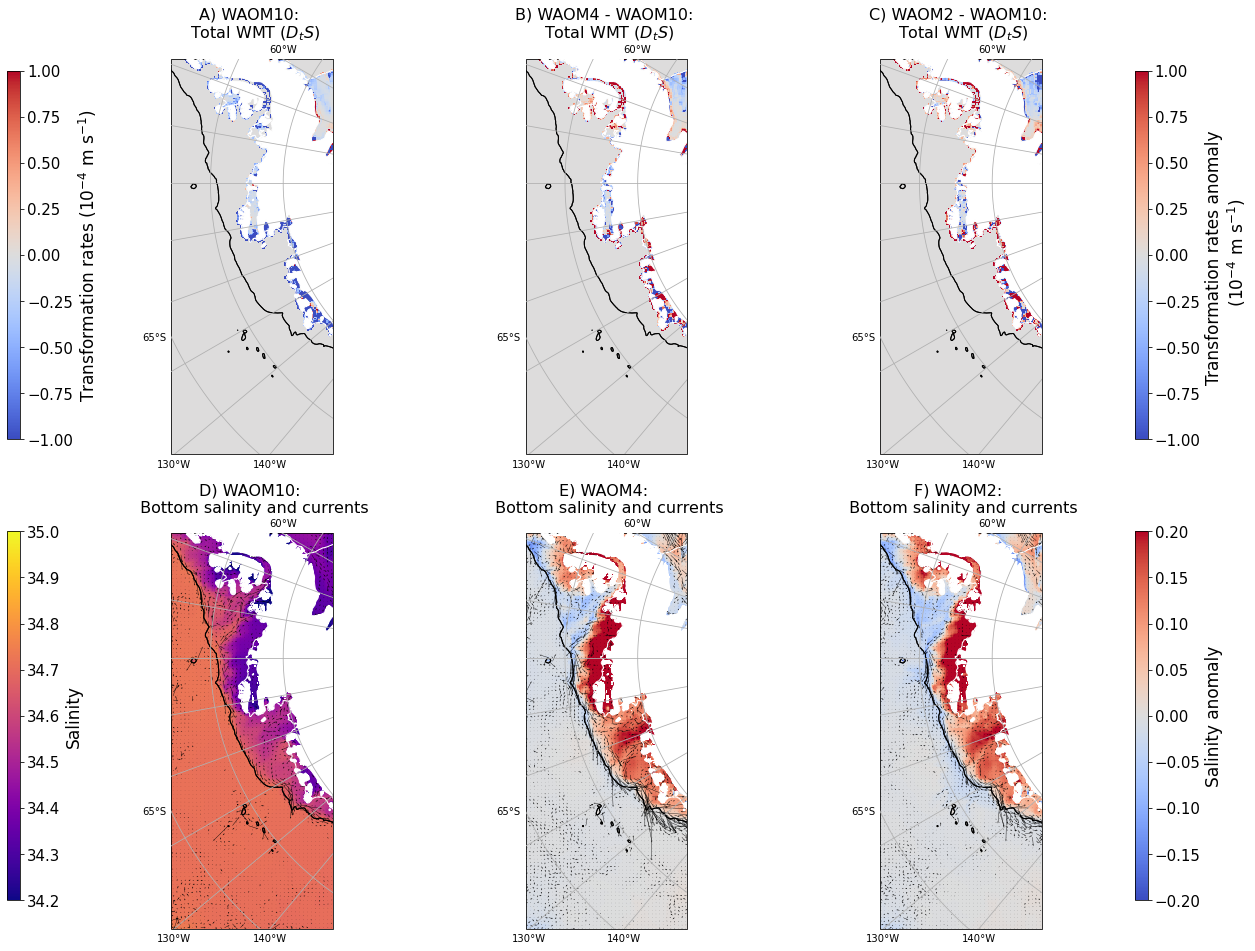

In [14]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# bottom salinity and annual currents: lower row

## plots WAnt
proj = ccrs.SouthPolarStereo()

# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_4_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_2_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom salinity and currents', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Bottom salinity and currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_2-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('F) WAOM2: \n Bottom salinity and currents', fontsize=16)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt_saltVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit c

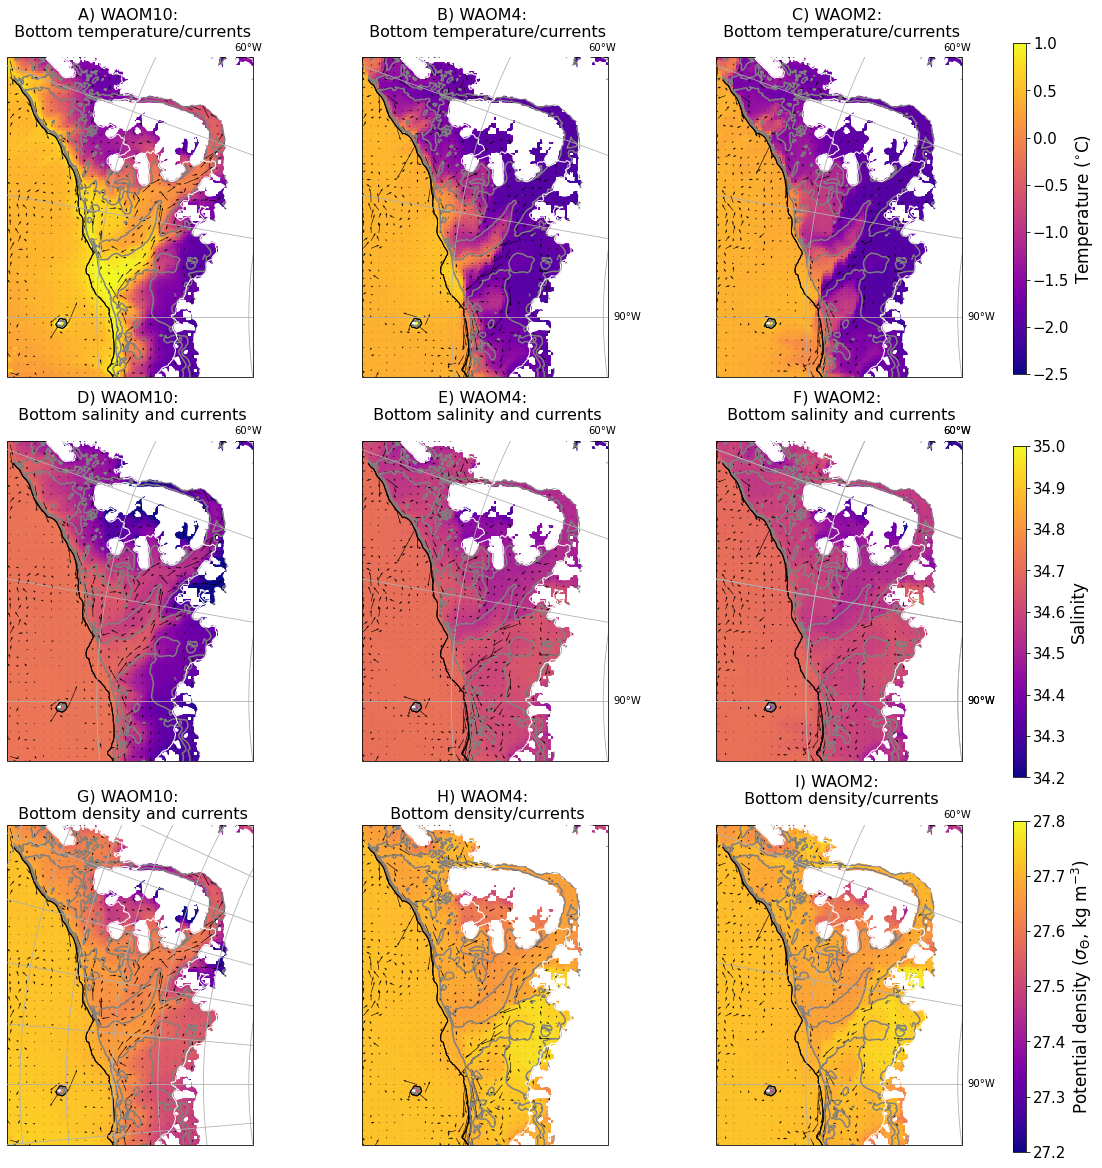

In [15]:
## absolute salt/temp for WAnt: making sense of currents?

fig = plt.figure(figsize=(18,20))

# temperature/currents (annual)
tmin=-2.5
tmax=1
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax1 = fig.add_subplot(3,3,1, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax1.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom temperature/currents', fontsize=16)
gl = ax1.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax2 = fig.add_subplot(3,3,2, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4, transform=ccrs.PlateCarree(),cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax2.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4: \n Bottom temperature/currents', fontsize=16)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,3,3, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax3.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM2: \n Bottom temperature/currents', fontsize=16)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.66, 0.01, 0.23])
fig.colorbar(ct, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(3,3,4, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom salinity and currents', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax5 = fig.add_subplot(3,3,5, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Bottom salinity and currents', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,3,6, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Bottom salinity and currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.92, 0.38, 0.01, 0.23])
fig.colorbar(cs, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

# density and currents (annual)
tmin=27.2
tmax=27.8

# calculate potential density:
dens_ann_bot_10 = gsw.rho(salt_ann_bot_10,temp_ann_bot_10,0) - 1000
dens_ann_bot_4 = gsw.rho(salt_ann_bot_4,temp_ann_bot_4,0) - 1000
dens_ann_bot_2 = gsw.rho(salt_ann_bot_2,temp_ann_bot_2,0) - 1000


ax7 = fig.add_subplot(3,3,7, projection=proj)
cr=plt.pcolormesh(lon_rho_10,lat_rho_10,dens_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax7.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('G) WAOM10: \n Bottom density and currents', fontsize=16)
ax7.gridlines(zorder=4)
ax7.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax8 = fig.add_subplot(3,3,8, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,dens_ann_bot_4, transform=ccrs.PlateCarree(),cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax8.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('H) WAOM4: \n Bottom density/currents', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax8.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,3,9, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,dens_ann_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax3.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('I) WAOM2: \n Bottom density/currents', fontsize=16)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax3 = fig.add_axes([0.92, 0.12, 0.01, 0.23])
fig.colorbar(cr, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Potential density ($\sigma_{\Theta}$, kg m$^{-3}$)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_bottom_salt_tempXsaltXdens_iceshelf_WAnt.png"
plt.savefig(fig_path + name_fig, dpi=300, bbox='tight')
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

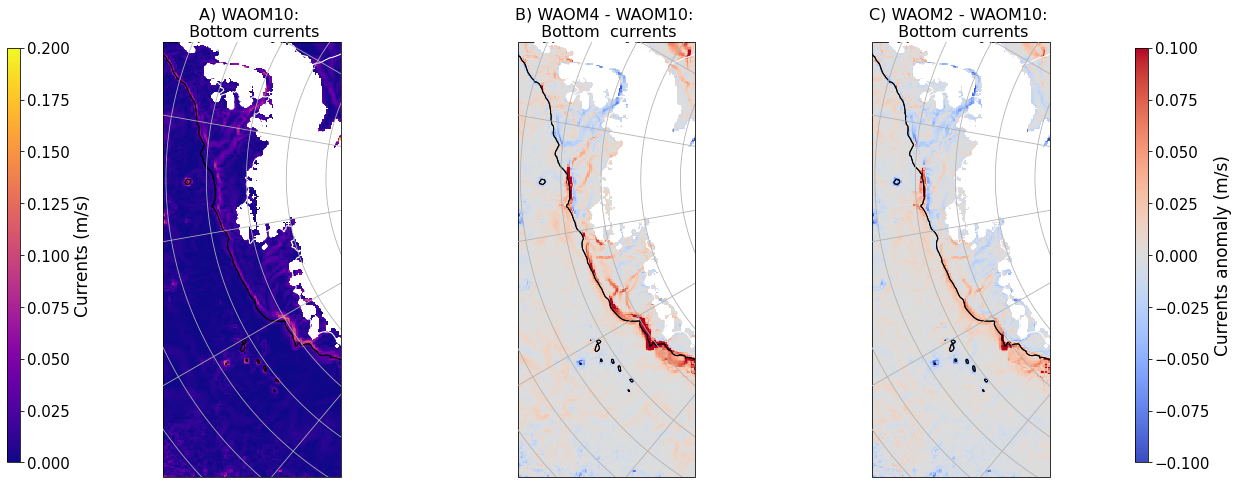

In [16]:
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(18,8))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(1,3,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.1
atmax=.1

ax5 = fig.add_subplot(1,3,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Bottom  currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(1,3,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V2_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM2 - WAOM10: \n Bottom currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt_Vel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797:

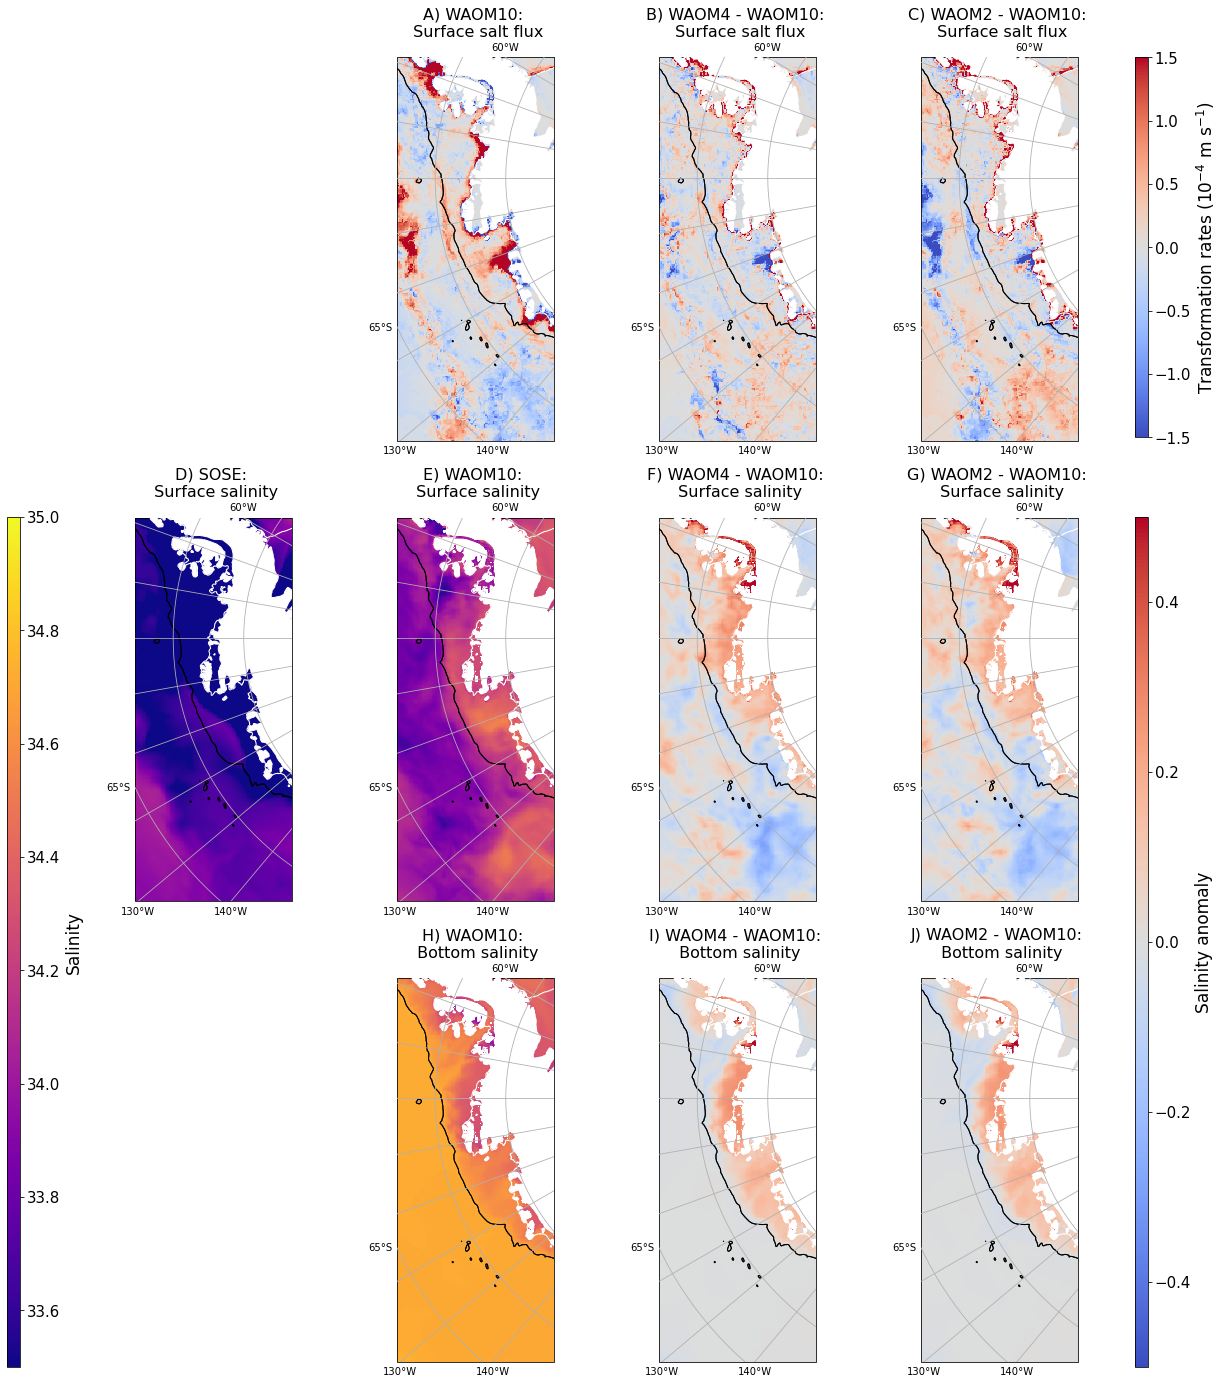

In [64]:
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_sfc_WAnt_10_shelf = np.nansum(np.squeeze(salt_sfc_10_shelf[imin:imax]), axis=0)
salt_sfc_WAnt_4_shelf = np.nansum(np.squeeze(salt_sfc_4_shelf[imin:imax]), axis=0)
salt_sfc_WAnt_2_shelf = np.nansum(np.squeeze(salt_sfc_2_shelf[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_sfc_WAnt_4_shelf_interp = pyresample.kd_tree.resample_custom(w4_def,salt_sfc_WAnt_4_shelf,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_sfc_WAnt_2_shelf_interp = pyresample.kd_tree.resample_custom(w2_def,salt_sfc_WAnt_2_shelf,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)


# scale for WMT rates:
scl = 1e4

# currents (annual)
tmin=-1.5
tmax=1.5

# spacing for current vectors:
vs10=5
vs4=12

fig = plt.figure(figsize=(18,24))

ax2 = fig.add_subplot(3,4,2, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_sfc_WAnt_10_shelf*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('A) WAOM10: \n Surface salt flux', fontsize=16)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.1
atmax=.1

ax3 = fig.add_subplot(3,4,3, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_sfc_WAnt_4_shelf_interp - salt_sfc_WAnt_10_shelf)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('B) WAOM4 - WAOM10: \n Surface salt flux', fontsize=16)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax4 = fig.add_subplot(3,4,4, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_sfc_WAnt_2_shelf_interp - salt_sfc_WAnt_10_shelf)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('C) WAOM2 - WAOM10: \n Surface salt flux', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax1 = fig.add_axes([0.92, 0.66, 0.01, 0.22])
fig.colorbar(ct, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (10$^{-4}$ m s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# salinity and currents (annual)
tmin=33.5
tmax=35

ax5 = fig.add_subplot(3,4,5, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,np.nanmean(SSS, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('D) SOSE: \n Surface salinity', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)


ax6 = fig.add_subplot(3,4,6, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('E) WAOM10: \n Surface salinity', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.5
atmax=.5

ax7 = fig.add_subplot(3,4,7, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('F) WAOM4 - WAOM10: \n Surface salinity', fontsize=16)
gl = ax7.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax7.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax8 = fig.add_subplot(3,4,8, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_2-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('G) WAOM2 - WAOM10: \n Surface salinity', fontsize=16)
gl = ax8.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax8.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax10 = fig.add_subplot(3,4,10, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax10.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('H) WAOM10: \n Bottom salinity', fontsize=16)
gl = ax10.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax10.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax10.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax11 = fig.add_subplot(3,4,11, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax11.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('I) WAOM4 - WAOM10: \n Bottom salinity', fontsize=16)
gl = ax11.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax11.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax11.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax12 = fig.add_subplot(3,4,12, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_2-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('J) WAOM2 - WAOM10: \n Bottom salinity', fontsize=16)
# cv=ax12.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
gl = ax12.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax12.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax12.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.122, 0.01, 0.492])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.122, 0.01, 0.492])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt+sfc_flx_shelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

In [17]:
# reading surface salt flux files:

ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom10_frc/waom10extend_swflux.nc')
swflx_10 = ds.variables['swflux']
ds.close()

ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom4_frc/waom4extend_swflux.nc')
swflx_4 = ds.variables['swflux']
ds.close()

ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom2_frc/waom2extend_swflux.nc')
swflx_2 = ds.variables['swflux']
ds.close()
                     


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 4 neighbours within 20000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: U

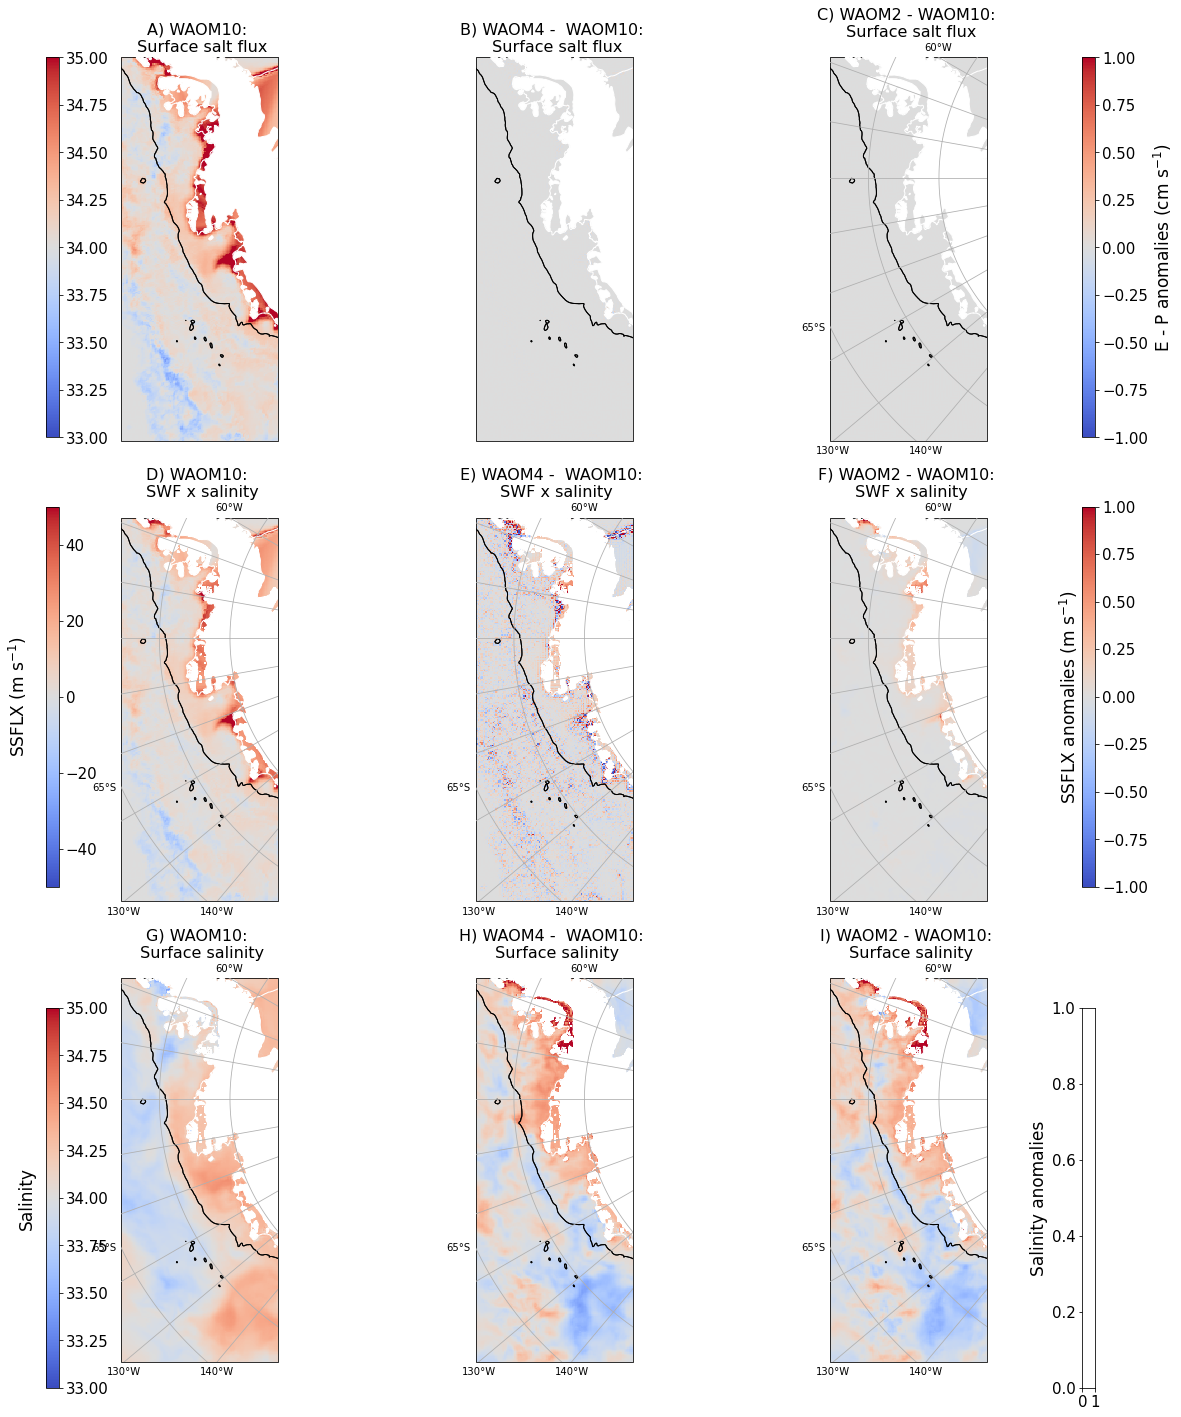

In [25]:
# interpolate transformation maps to 10km grid to show difference:
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

#salt_vdiff_Wed_4
swflx_4_interp = pyresample.kd_tree.resample_custom(w4_def,np.nanmean(swflx_4, axis=0),w10_def,\
                                         radius_of_influence=20000,neighbours=4,weight_funcs=wf)
#                                          radius_of_influence=30000,neighbours=10,weight_funcs=wf)
swflx_2_interp = pyresample.kd_tree.resample_custom(w2_def,np.nanmean(swflx_2, axis=0),w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)
# sfc salt flux
tmin=-1.
tmax=1.

fig = plt.figure(figsize=(18,24))

ax1 = fig.add_subplot(3,3,1, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,np.nanmean(swflx_10, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('A) WAOM10: \n Surface salt flux', fontsize=16)
gl = ax2.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax1 = fig.add_axes([0.12, 0.66, 0.01, 0.22])
fig.colorbar(ct, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('E - P (cm s$^{-1}$)', fontsize=17, labelpad=-90)
cbar_ax1.tick_params(labelsize=15)

# for anomalies
atmin=-.1
atmax=.1

ax2 = fig.add_subplot(3,3,2, projection=proj)
cta=plt.pcolormesh(lon_rho_10,lat_rho_10,swflx_4_interp - np.nanmean(swflx_10, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('B) WAOM4 -  WAOM10: \n Surface salt flux', fontsize=16)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,3,3, projection=proj)
cta=plt.pcolormesh(lon_rho_10,lat_rho_10,swflx_2_interp - np.nanmean(swflx_10, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('C) WAOM2 - WAOM10: \n Surface salt flux', fontsize=16)
gl = ax3.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax2 = fig.add_axes([0.92, 0.66, 0.01, 0.22])
fig.colorbar(cta, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('E - P anomalies (cm s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

tmin=-50.
tmax=50.

ax4 = fig.add_subplot(3,3,4, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,np.nanmean(swflx_10, axis=0)*salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('D) WAOM10: \n SWF x salinity', fontsize=16)
gl = ax4.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax3 = fig.add_axes([0.12, 0.4, 0.01, 0.22])
fig.colorbar(ct, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('SSFLX (m s$^{-1}$)', fontsize=17, labelpad=-90)
cbar_ax3.tick_params(labelsize=15)

# for anomalies
atmin=-.1
atmax=.1

ax5 = fig.add_subplot(3,3,5, projection=proj)
cta=plt.pcolormesh(lon_rho_10,lat_rho_10,swflx_4_interp*salt_ann_sfc_4 - np.nanmean(swflx_10, axis=0)*salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('E) WAOM4 -  WAOM10: \n SWF x salinity', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,3,6, projection=proj)
cta=plt.pcolormesh(lon_rho_10,lat_rho_10,swflx_2_interp*salt_ann_sfc_2 - np.nanmean(swflx_10, axis=0)*salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('F) WAOM2 - WAOM10: \n SWF x salinity', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax4 = fig.add_axes([0.92, 0.4, 0.01, 0.22])
fig.colorbar(cta, cax=cbar_ax4, orientation='vertical')
cbar_ax4.set_ylabel('SSFLX anomalies (m s$^{-1}$)', fontsize=17, labelpad=-90)
cbar_ax4.tick_params(labelsize=15)

tmin=33.
tmax=35.

ax7 = fig.add_subplot(3,3,7, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('G) WAOM10: \n Surface salinity', fontsize=16)
gl = ax7.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax7.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax5 = fig.add_axes([0.12, 0.11, 0.01, 0.22])
fig.colorbar(ct, cax=cbar_ax5, orientation='vertical')
cbar_ax5.set_ylabel('Salinity', fontsize=17, labelpad=-90)
cbar_ax5.tick_params(labelsize=15)

# for anomalies
atmin=-.5
atmax=.5

ax8 = fig.add_subplot(3,3,8, projection=proj)
cta=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4 - salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('H) WAOM4 -  WAOM10: \n Surface salinity', fontsize=16)
gl = ax8.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax8.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax9 = fig.add_subplot(3,3,9, projection=proj)
cta=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_2 - salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
plt.title('I) WAOM2 - WAOM10: \n Surface salinity', fontsize=16)
gl = ax9.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax9.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax9.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

cbar_ax6 = fig.add_axes([0.92, 0.11, 0.01, 0.22])
fig.colorbar(ct, cax=cbar_ax1, orientation='vertical')
cbar_ax6.set_ylabel('Salinity anomalies', fontsize=17)#, labelpad=-35)
cbar_ax6.tick_params(labelsize=15)

In [ ]:
# Surface salinity and SOSE:

tmin=33.5
tmax=35

fig = plt.figure(figsize=(18,8))

ax5 = fig.add_subplot(1,4,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,np.nanmean(SSS, axis=0), transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('D) SOSE: \n Surface salinity', fontsize=16)
gl = ax5.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax5.set_extent([-180, 180, -90, -65], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)


ax6 = fig.add_subplot(1,4,2, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('E) WAOM10: \n Surface salinity', fontsize=16)
gl = ax6.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax6.set_extent([-180, 180, -90, -65], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.5
atmax=.5

ax7 = fig.add_subplot(1,4,3, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('F) WAOM4 - WAOM10: \n Surface salinity', fontsize=16)
gl = ax7.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax7.set_extent([-180, 180, -90, -65], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax8 = fig.add_subplot(1,4,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_2, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=tmin, vmax=tmax)
plt.title('G) WAOM2 - WAOM10: \n Surface salinity', fontsize=16)
gl = ax8.gridlines(zorder=4,draw_labels=True, dms=False, x_inline=False, y_inline=False)
gl.rotate_labels = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(-55,-80,-5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax8.set_extent([-180, 180, -90, -65], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)


cbar_ax6 = fig.add_axes([0.92, 0.11, 0.01, 0.22])
fig.colorbar(ct1, cax=cbar_ax1, orientation='vertical')
cbar_ax6.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax6.tick_params(labelsize=15)

plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit c

In [18]:
ds = xr.open_dataset('/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom10extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0020.nc')
print('size temp and time length: ', ds.temp.shape, len(ds.salt.isel(xi_rho=20, eta_rho=100, s_rho=0)))

size temp and time length:  (12, 31, 560, 630) 12


In [19]:
temp_tmp = ds.variables["temp"]
ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

coords={'X':{'center':'xi_rho', 'inner':'xi_u'},
    'Y':{'center':'eta_rho', 'inner':'eta_v'},
    'Z':{'center':'s_rho', 'outer':'s_w'}}

grid = Grid(ds, coords=coords, periodic=[])

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = Zo_rho * (ds.zeta + ds.h) + ds.zeta + ds.zice

ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')

In [20]:
z_rho.shape

(31, 560, 630, 12)

/run/nvme/job_14299821/tmp/ipykernel_1394656/2282978857.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(np.nanmean(z_rho[-1,:,:,:],axis=2))


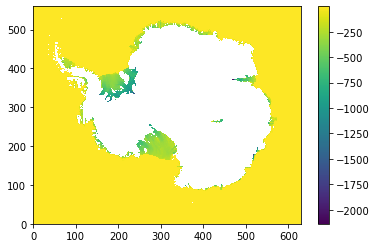

In [22]:
plt.pcolormesh(np.nanmean(z_rho[-1,:,:,:],axis=2))
plt.colorbar()